In [1]:
# Setup environment+ paths
import os
import sys
import matplotlib.pyplot as plt
from PIL import Image

sys.path.append("../src")

from xraygen.data.dataset import XRayDataset

import pandas as pd
from torch.utils.data import DataLoader
import torchvision.transforms as T

In [ ]:
# Load CSV file
csv_path = "../data/raw/metadata_sample.csv"
img_root = "../data/raw/"

df = pd.read_csv(csv_path)
print("CSV loaded:")
print(df.head())

CSV loaded:
      filename  has_contraband
0  sample1.png               0
1  sample8.png               1
2  sample2.png               0


In [6]:
# Create PyTorch Dataset
transform = T.Compose([
    T.Resize((256,256)),
    T.ToTensor(),
])

dataset = XRayDataset(csv_path, img_root, transform=transform)

print(f"\nDataset size: {len(dataset)} samples")





Dataset size: 3 samples



Displaying first 3 samples:


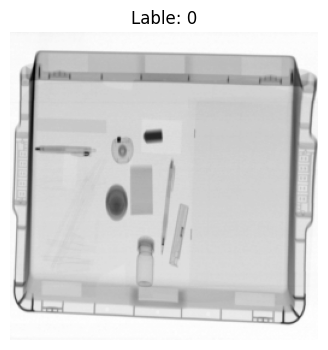

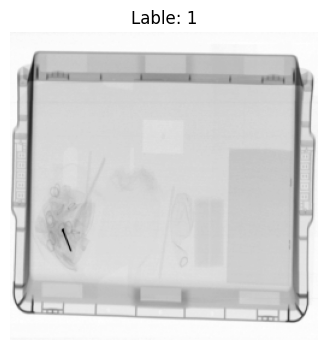

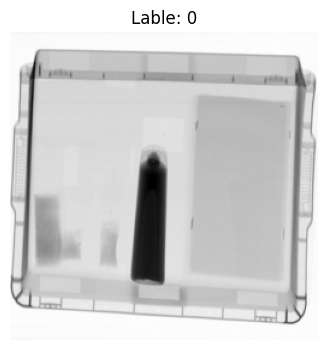

In [ ]:
#show a few samples

def show_sample(index):
    img, label = dataset[index]
    img = img.squeeze(0).numpy() #remove channel dimension

    plt.figure(figsize=(4,4))
    plt.imshow(img, cmap="gray")
    plt.title(f"Lable: {label}")
    plt.axis("off")
    plt.show()

print ("\nDisplaying first 3 samples:")
for i in range(min(3, len(dataset))):
    show_sample(i)


In [ ]:
# Optin 2: Use Dataloader to load batches
loader = DataLoader(dataset, batch_size=2, shuffle=True)

batch_img, batch_label = next(iter(loader))
print("\nBatch tensor shape:", batch_img.shape)
print("Batch labels:", batch_label.tolist())


Batch tensor shape: torch.Size([2, 1, 256, 256])
Batch labels: [0, 1]
